Decision Tree Classification Tutorial

In [5]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split,cross_validate,GridSearchCV
from sklearn.metrics import roc_auc_score, accuracy_score,classification_report,confusion_matrix
import matplotlib.pyplot as plt

In [6]:
age=np.random.uniform(low=20,high=70,size=1000)
income=(np.random.pareto(a=2,size=1000) + 1)*20000
x=np.vstack([age,income]).T
y=np.random.randint(low=0,high=2,size=1000)

In [7]:
a,b,c,d=train_test_split(x,y,test_size=0.2,random_state=1,stratify=y)
model=DecisionTreeClassifier(criterion="gini",random_state=1)
crossv=cross_validate(estimator=model,X=a,y=c,scoring="roc_auc",cv=7)
print("Prediction AUROC will be around; ",pd.Series(crossv["test_score"]).median())
model.fit(a,c)
probs=model.predict_proba(b)[:,1]
pred=model.predict(b)
roc_auc_score(d,probs),accuracy_score(d,pred)

Prediction AUROC will be around;  0.4956140350877193


(0.48974897489748975, 0.49)

In [8]:
a,b,c,d=train_test_split(x,y,test_size=0.2,random_state=1,stratify=y)
model=DecisionTreeClassifier(criterion="entropy",random_state=1)
crossv=cross_validate(estimator=model,X=a,y=c,scoring="roc_auc",cv=7)
print("Prediction AUROC will be around; ",pd.Series(crossv["test_score"]).median())
model.fit(a,c)
probs=model.predict_proba(b)[:,1]
pred=model.predict(b)
roc_auc_score(d,probs),accuracy_score(d,pred)

Prediction AUROC will be around;  0.5175438596491229


(0.4447944794479448, 0.445)

In [9]:
a,b,c,d=train_test_split(x,y,test_size=0.2,random_state=1,stratify=y)
model=DecisionTreeClassifier(criterion="log_loss",random_state=1)
crossv=cross_validate(estimator=model,X=a,y=c,scoring="roc_auc",cv=7)
print("Prediction AUROC will be around; ",pd.Series(crossv["test_score"]).median())
model.fit(a,c)
probs=model.predict_proba(b)[:,1]
pred=model.predict(b)
roc_auc_score(d,probs),accuracy_score(d,pred)

Prediction AUROC will be around;  0.5175438596491229


(0.4447944794479448, 0.445)

In [10]:
# everything random, logloss and entropy exceeded our prediction, let's increase the test size

In [11]:
age=np.random.uniform(low=20, high=70, size=10000)
income=(np.random.pareto(a=2, size=10000) + 1) * 20000
x=np.vstack([age,income]).T
y=np.random.randint(low=0,high=2,size=10000)

In [12]:
a,b,c,d=train_test_split(x,y,test_size=0.2,random_state=1,stratify=y)
model=DecisionTreeClassifier(criterion="gini",random_state=1)
crossv=cross_validate(estimator=model,X=a,y=c,scoring="roc_auc",cv=7)
print("Prediction AUROC will be around; ",pd.Series(crossv["test_score"]).median())
model.fit(a,c)
probs=model.predict_proba(b)[:,1]
pred=model.predict(b)
roc_auc_score(d,probs),accuracy_score(d,pred)

Prediction AUROC will be around;  0.5057270138697529


(0.5044370399333593, 0.5045)

In [13]:
a,b,c,d=train_test_split(x,y,test_size=0.2,random_state=1,stratify=y)
model=DecisionTreeClassifier(criterion="entropy",random_state=1)
crossv=cross_validate(estimator=model,X=a,y=c,scoring="roc_auc",cv=7)
print("Prediction AUROC will be around; ",pd.Series(crossv["test_score"]).median())
model.fit(a,c)
probs=model.predict_proba(b)[:,1]
pred=model.predict(b)
roc_auc_score(d,probs),accuracy_score(d,pred)

Prediction AUROC will be around;  0.5171259300082668


(0.5034100306902762, 0.5035)

In [14]:
a,b,c,d=train_test_split(x,y,test_size=0.2,random_state=1,stratify=y)
model=DecisionTreeClassifier(criterion="log_loss",random_state=1)
crossv=cross_validate(estimator=model,X=a,y=c,scoring="roc_auc",cv=7)
print("Prediction AUROC will be around; ",pd.Series(crossv["test_score"]).median())
model.fit(a,c)
probs=model.predict_proba(b)[:,1]
pred=model.predict(b)
roc_auc_score(d,probs),accuracy_score(d,pred)

Prediction AUROC will be around;  0.5171259300082668


(0.5034100306902762, 0.5035)

In [15]:
# our predictions are accurate
# so large and samll datasets affects the, decision trees are prone to overfitting 

In [16]:
income_brackets=pd.cut(income,bins=[0,30000,60000,90000,np.inf],labels=[0,1,2,3])
age_groups=pd.cut(age,bins=[20,30,40,50,60,70],labels=[0,1,2,3,4])
X=np.column_stack((age_groups,income_brackets))
a,b,c,d=train_test_split(x,y,test_size=0.2,random_state=1,stratify=y)
model=DecisionTreeClassifier(criterion="log_loss",random_state=1)
crossv=cross_validate(estimator=model,X=a,y=c,scoring="roc_auc",cv=7)
print("Prediction: AUROC will be near, ",pd.Series(crossv["test_score"]).median())
model.fit(a,c)
probs=model.predict_proba(b)[:,1]
pred=model.predict(b)
roc_auc_score(d,probs),accuracy_score(d,pred)

Prediction: AUROC will be near,  0.5171259300082668


(0.5034100306902762, 0.5035)

In [17]:
data=fetch_california_housing(as_frame=True).frame

In [18]:
data["MedHouseVal"]=(data["MedHouseVal"]>data["MedHouseVal"].median()).astype(int)

In [19]:
data["MedHouseVal"].value_counts()

MedHouseVal
0    10323
1    10317
Name: count, dtype: int64

In [20]:
x=data.drop("MedHouseVal",axis=True)
y=data["MedHouseVal"]

In [21]:
a,b,c,d=train_test_split(x,y,train_size=10000,random_state=1,stratify=y)

In [22]:
model=DecisionTreeClassifier(criterion="log_loss", max_depth=10, random_state=1)
crossv=cross_validate(model,cv=10,X=a,y=c,scoring="roc_auc")
print("Prediction: AUROC will be near, ",pd.Series(crossv["test_score"]).median())
model.fit(a, c)
probs=model.predict_proba(b)[:,1]
pred=model.predict(b)
roc_auc_score(d,probs),accuracy_score(d,pred)

Prediction: AUROC will be near,  0.8815277642870571


(0.896723832144812, 0.8451127819548873)

In [23]:
print(classification_report(d,pred))

              precision    recall  f1-score   support

           0       0.85      0.84      0.84      5322
           1       0.84      0.85      0.85      5318

    accuracy                           0.85     10640
   macro avg       0.85      0.85      0.85     10640
weighted avg       0.85      0.85      0.85     10640



In [24]:
confusion_matrix(d,pred)

array([[4476,  846],
       [ 802, 4516]], dtype=int64)

In [26]:
model=DecisionTreeClassifier()
para={"criterion":["gini","entropy","log_loss"],
      "ccp_alpha":[0.001,0.01,0.1,1],
      "min_samples_split":[2,6,10],
      "min_samples_leaf":[2,4,6],
      "max_leaf_nodes":[2,4,6],
      "max_features":["sqrt","log2"],
      }
rscv=GridSearchCV(estimator=model,param_grid=para,scoring=["f1","roc_auc"],cv=10,verbose=1,n_jobs=-1,refit="roc_auc",return_train_score=True)
rscv.fit(a,c)

Fitting 10 folds for each of 648 candidates, totalling 6480 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'ccp_alpha': [0.001, 0.01, 0.1, 1],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_features': ['sqrt', 'log2'],
                         'max_leaf_nodes': [2, 4, 6],
                         'min_samples_leaf': [2, 4, 6],
                         'min_samples_split': [2, 6, 10]},
             refit='roc_auc', return_train_score=True,
             scoring=['f1', 'roc_auc'], verbose=1)

In [27]:
a=rscv.predict_proba(b)[:,1]
roc_auc_score(d,a)

0.8018767739664161

In [28]:
rscv.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.01, criterion='log_loss',
                       max_features='log2', max_leaf_nodes=6,
                       min_samples_leaf=6, min_samples_split=10)

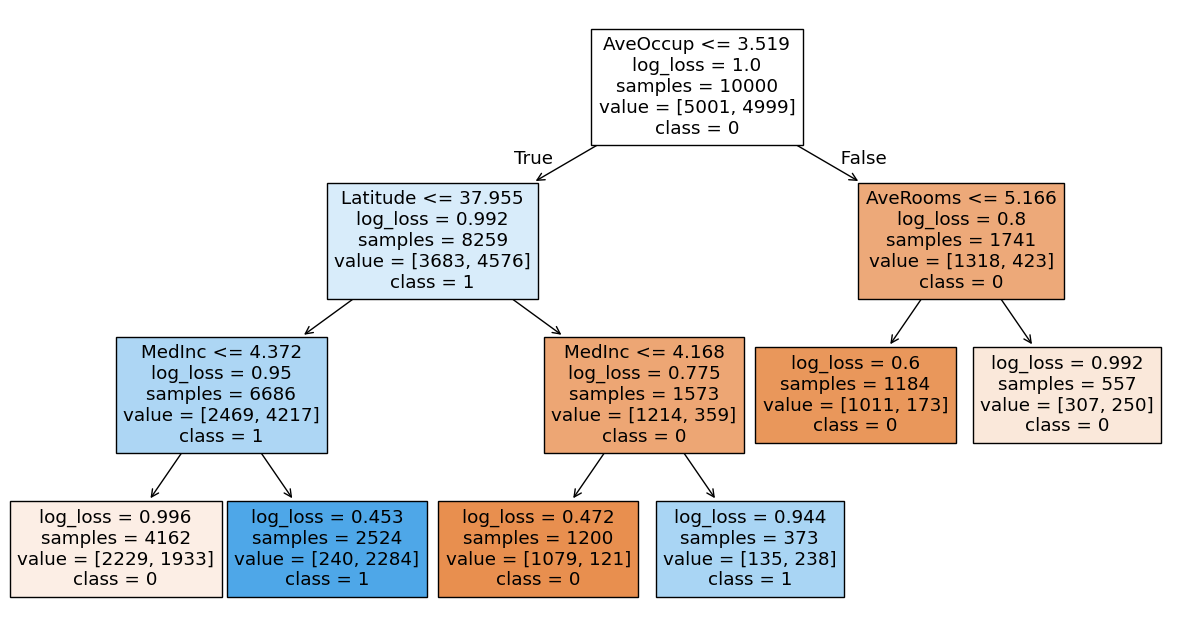

In [29]:
plt.figure(figsize=(15, 8))
plot_tree(rscv.best_estimator_, feature_names=x.columns, class_names=["0", "1"], filled=True)
plt.show()

In [30]:
from ucimlrepo import fetch_ucirepo 
heart_disease = fetch_ucirepo(id=45) 
x=heart_disease.data.features 
y=heart_disease.data.targets 
print(heart_disease.metadata) 
print(heart_disease.variables) 

{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'ID': 231, 'type': 'NATIVE', 'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.', 'authors': 'R. Detrano, A. Jánosi, W. Steinbrunn, M

In [31]:
y.value_counts()

num
0      164
1       55
2       36
3       35
4       13
Name: count, dtype: int64

In [32]:
y=(y>0).astype(int)
y.value_counts()

num
0      164
1      139
Name: count, dtype: int64

In [33]:
a,b,c,d=train_test_split(x,y,test_size=0.2,random_state=1,stratify=y)
para={
      "criterion":["gini","entropy","log_loss"],
      "ccp_alpha":[0.001,0.01,0.1,1],
      "min_samples_split":[2,6,10],
      "min_samples_leaf":[2,4,6],
      "max_leaf_nodes":[2,4,6],
      "max_features":["sqrt","log2"]
}
gridcv = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=para,scoring=["roc_auc","f1"], cv=5, verbose=1, n_jobs=-1, refit="f1")
gridcv.fit(a, c)

Fitting 5 folds for each of 648 candidates, totalling 3240 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'ccp_alpha': [0.001, 0.01, 0.1, 1],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_features': ['sqrt', 'log2'],
                         'max_leaf_nodes': [2, 4, 6],
                         'min_samples_leaf': [2, 4, 6],
                         'min_samples_split': [2, 6, 10]},
             refit='f1', scoring=['roc_auc', 'f1'], verbose=1)

In [34]:
best_model = gridcv.best_estimator_
probs = best_model.predict_proba(b)[:, 1]
pred = best_model.predict(b)

roc_auc = roc_auc_score(d, probs)
acc = accuracy_score(d, pred)

print("Best Parameters:", gridcv.best_params_)
print("Final AUROC:", roc_auc)
print("Final Accuracy:", acc)
print("Classification Report:\n", classification_report(d, pred))

Best Parameters: {'ccp_alpha': 0.001, 'criterion': 'entropy', 'max_features': 'sqrt', 'max_leaf_nodes': 6, 'min_samples_leaf': 6, 'min_samples_split': 2}
Final AUROC: 0.8425324675324675
Final Accuracy: 0.7540983606557377
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.82      0.78        33
           1       0.76      0.68      0.72        28

    accuracy                           0.75        61
   macro avg       0.76      0.75      0.75        61
weighted avg       0.75      0.75      0.75        61



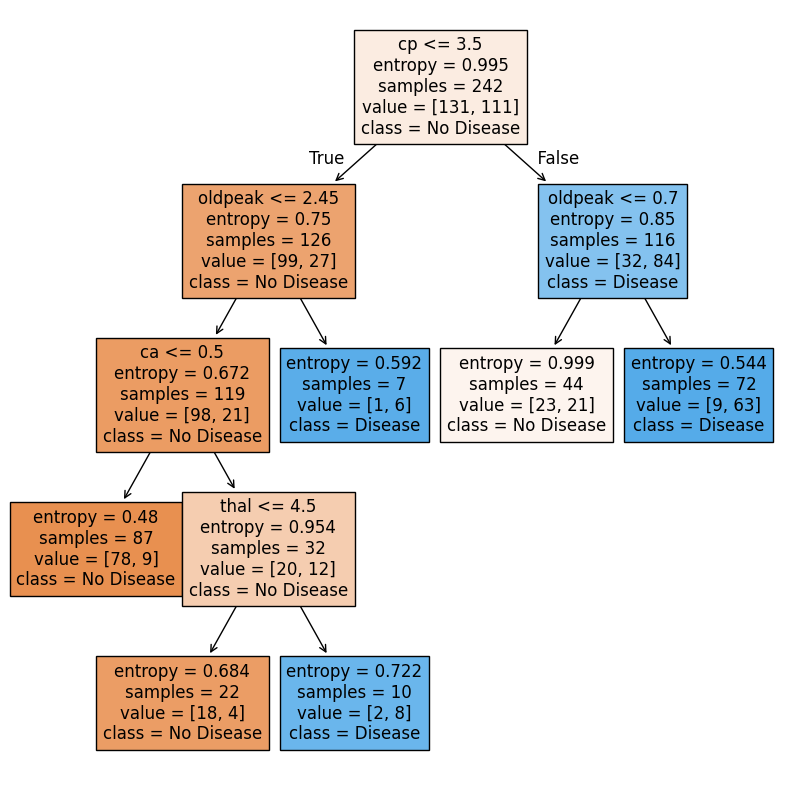

In [36]:
plt.figure(figsize=(10,10))
plot_tree(best_model,feature_names=x.columns,class_names=["No Disease", "Disease"],filled=True)
plt.show()